In [44]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

print(cv.__version__)

3.4.2


In [3]:
img_base = cv.imread("figures/1.png", cv.IMREAD_GRAYSCALE)
img_rotate = cv.imread("figures/2.png", cv.IMREAD_GRAYSCALE)

print(img_base.shape)
print(img_rotate.shape)

(480, 640)
(480, 640)


<class 'list'>


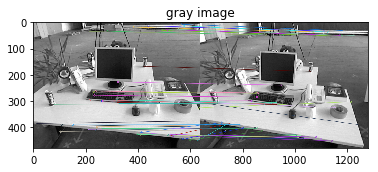

912


In [9]:
# Sift Create and calculate
sift = cv.xfeatures2d.SIFT_create()
# Kp is key points
# des is feature descriptor
# len(des) = len(Kp) * 128
kp1, des1 = sift.detectAndCompute(img_base, None)
kp2, des2 = sift.detectAndCompute(img_rotate, None)

bf = cv.BFMatcher(cv.NORM_L2, crossCheck=True)

matches = bf.match(des1, des2)
print(type(matches))
matches = sorted(matches, key=lambda x: x.distance)

img = cv.drawMatches(img_base, kp1, img_rotate, kp2, matches[:50], None, flags=2)
plt.figure(), plt.imshow(img, cmap='Greys_r'), plt.title("gray image"), plt.show()

print(len(matches))

In [22]:
print(matches[0].distance)
print(kp1[matches[0].trainIdx].pt)
print(type(kp1[matches[0].trainIdx].pt))
print(matches[0].queryIdx)
print(matches[1].distance)
print(matches[1].trainIdx)
print(matches[1].queryIdx)

19.595918655395508
(205.56924438476562, 26.917091369628906)
<class 'tuple'>
304
24.14539337158203
1260
1260


In [24]:
points1 = np.zeros((len(matches), 2))
points2 = np.zeros((len(matches), 2))


for i in range(len(matches)):
    points1[i, :] = np.array(kp1[matches[i].queryIdx].pt)
    points2[i, :] = np.array(kp1[matches[i].trainIdx].pt)
    
print(points1)
print(points2)

[[108.86816406 391.00906372]
 [448.94223022 424.20684814]
 [263.40148926 300.43875122]
 ...
 [ 61.29779434 264.79379272]
 [371.64819336 319.44232178]
 [468.1882019  284.24002075]]
[[205.56924438  26.91709137]
 [448.94223022 424.20684814]
 [253.06187439  33.71142578]
 ...
 [229.14064026  15.05360317]
 [167.36642456 214.28330994]
 [431.23001099 286.94018555]]


In [53]:
fundamental_matrix, _ = cv.findFundamentalMat ( points1, points2, cv.FM_RANSAC)
#print(fundamental_matrix)

principal_point = ( 325.1, 249.7 )
focal_length = 521
essential_matrix, _ = cv.findEssentialMat ( points1, points2, focal_length, principal_point );

homography_matrix, _ = cv.findHomography ( points1, points2, cv.RANSAC, 3 );

retval, R, t, mask = cv.recoverPose ( essential_matrix, points1, points2, focal = focal_length, pp = principal_point)
print(retval)
print(R)
print(t)

797
[[ 0.98360983 -0.17309333 -0.05050151]
 [ 0.17979284  0.9203354   0.34735758]
 [-0.01364696 -0.35074413  0.93637189]]
[[-0.03267162]
 [-0.94211514]
 [ 0.33369393]]


In [54]:
def isRotationMatrix(R) :
    Rt = np.transpose(R)
    shouldBeIdentity = np.dot(Rt, R)
    I = np.identity(3, dtype = R.dtype)
    n = np.linalg.norm(I - shouldBeIdentity)
    return n < 1e-6

def rotationMatrixToEulerAngles(R) :
    assert(isRotationMatrix(R))
    sy = math.sqrt(R[0,0] * R[0,0] +  R[1,0] * R[1,0])
    singular = sy < 1e-6
    if  not singular :
        x = math.atan2(R[2,1] , R[2,2])
        y = math.atan2(-R[2,0], sy)
        z = math.atan2(R[1,0], R[0,0])
    else :
        x = math.atan2(-R[1,2], R[1,1])
        y = math.atan2(-R[2,0], sy)
        z = 0

    return np.array([x, y, z])

In [55]:
rotate_angle = rotationMatrixToEulerAngles(R)
print(rotate_angle)

[-0.35840048  0.01364738  0.18079288]
